In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/abbas/SZIC AI/Logistic Regression/titanic.csv')
data

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
data.info

<bound method DataFrame.info of      PassengerId                                               Name  Pclass  \
0              1                            Braund, Mr. Owen Harris       3   
1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2              3                             Heikkinen, Miss. Laina       3   
3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4              5                           Allen, Mr. William Henry       3   
..           ...                                                ...     ...   
886          887                              Montvila, Rev. Juozas       2   
887          888                       Graham, Miss. Margaret Edith       1   
888          889           Johnston, Miss. Catherine Helen "Carrie"       3   
889          890                              Behr, Mr. Karl Howell       1   
890          891                                Dooley, Mr. Patrick       3   

        Sex   Age  

In [4]:
data.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [5]:
mean_age=data['Age'].mean()
mean_age

29.69911764705882

In [6]:
data['Age'].fillna(mean_age,inplace=True)

In [7]:
data.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [8]:
age = data[['Age']]
age.isnull().sum()

Age    0
dtype: int64

In [9]:
sip = data[['SibSp']]

# One Hot Encoding

In [10]:
daata = data[['Sex','Embarked']]

In [11]:
dummy = pd.get_dummies(daata)

In [12]:
dummy

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [13]:
x = dummy
x

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [14]:
x['Age']= age
x.isnull().sum()

Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Age           0
dtype: int64

In [15]:
x['Sibsp']= sip
x

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Sibsp
0,0,1,0,0,1,22.000000,1
1,1,0,1,0,0,38.000000,1
2,1,0,0,0,1,26.000000,0
3,1,0,0,0,1,35.000000,1
4,0,1,0,0,1,35.000000,0
...,...,...,...,...,...,...,...
886,0,1,0,0,1,27.000000,0
887,1,0,0,0,1,19.000000,0
888,1,0,0,0,1,29.699118,1
889,0,1,1,0,0,26.000000,0


In [16]:
y = data[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size=0.2 , random_state = 50 , shuffle = True)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg = LogisticRegression()

In [20]:
lg.fit(x_train,y_train)

/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
lg.score(x_train,y_train)

0.7921348314606742

In [22]:
lg.score(x_test,y_test)

0.7821229050279329

In [23]:
y_pred = lg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1])

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[87, 25],
       [14, 53]])

In [26]:
import seaborn as sns

<AxesSubplot:>

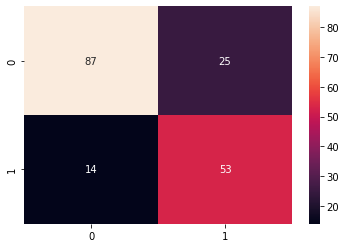

In [27]:
fig = plt.figure()
confusion_matrix = cm
sns.heatmap(confusion_matrix,annot = True)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5000)

In [29]:
rfc.fit(x_train,y_train)

/tmp/ipykernel_9910/4070307935.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=5000)

In [31]:
rfc.score(x_train,y_train)

0.8960674157303371

In [32]:
rfc.score(x_test,y_test)

0.7821229050279329

# SVM

In [45]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [46]:
SVM_Score=svm.score(x_test,y_test)
SVM_Score

0.7821229050279329